In [1]:
import numpy as np
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D,AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import add
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,LearningRateScheduler
import h5py
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
# from skimage import exposure

In [48]:
# read images into array
data=[]
i=0
# for item in os.walk('pics/image Data/bottles'):
#     files=item[2]
#     for file in files:
#         img=cv2.imread('pics/image Data/bottles/'+file)
#         data.append([i,img,'plastic'])
#         i+=1
for item in os.walk('pics/image Data/coffe cup'):
    files=item[2]
    for file in files:
        img=cv2.imread('pics/image Data/coffee cup/'+file)
        data.append([i,img,'paper'])
        i+=1 
for item in os.walk('pics/image Data/crumbled paper'):
    files=item[2]
    for file in files:
        img=cv2.imread('pics/image Data/crumbled paper/'+file)
        data.append([i,img,'paper'])
        i+=1
for item in os.walk('pics/image Data/juice cup'):
    files=item[2]
    for file in files:
        img=cv2.imread('pics/image Data/juice cup/'+file)
        data.append([i,img,'plastic'])
        i+=1  
for item in os.walk('pics/image Data/metal can'):
    files=item[2]
    for file in files:
        img=cv2.imread('pics/image Data/metal can/'+file)
        data.append([i,img,'can'])
        i+=1        
for item in os.walk('pics/image Data/plastic bag'):
    files=item[2]
    for file in files:
        img=cv2.imread('pics/image Data/plastic bag/'+file)
        data.append([i,img,'plastic'])
        i+=1         

In [56]:
# read images into array
data=[]
i=0
for item in os.walk('pics/image Data/bottles'):
    files=item[2]
    for file in files:
        img=cv2.imread('pics/image Data/bottles/'+file)
        data.append([i,img,'plastic'])
        i+=1
for item in os.walk('pics_highres/image Data/paper'):
    files=item[2]
    for file in files:
        img=cv2.imread('pics_highres/image Data/paper/'+file)
        data.append([i,img,'paper'])
        i+=1 
for item in os.walk('pics_highres/image Data/plastic'):
    files=item[2]
    for file in files:
        img=cv2.imread('pics_highres/image Data/paper/'+file)
        data.append([i,img,'plastic'])
        i+=1
for item in os.walk('pics_highres/image Data/can'):
    files=item[2]
    for file in files:
        img=cv2.imread('pics_highres/image Data/can/'+file)
        data.append([i,img,'can'])
        i+=1        

In [65]:
# training data
image_height=256
image_width=256
dataset=None
labelset=None
dataset=np.zeros(shape=(103,image_height,image_width))
labelset=np.zeros(shape=(103))
i=0
for item in os.walk('pics_whitebackground/Validation/plastic'):
    files=item[2]
    for file in files:
        try:
            img=cv2.imread('pics_whitebackground/Validation/plastic/'+file)
#             x,y=int(img.shape[1]/2),int(img.shape[0]/2)
#             crop1=img[x-128:x+128,y-128:y+128]
#             crop2=img[:-256,:-256]
            img=cv2.resize(img,(image_height,image_width))
            img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            labelset[i]=0
#             labelset[i+1]=0
#             labelset[i+2]=0
            dataset[i]=img
#             dataset[i+1]=crop1
#             dataset[i+2]=crop2
            i+=1
        except:
            continue
for item in os.walk('pics_whitebackground/Validation/paper'):
    files=item[2]
    for file in files:
        try:
            img=cv2.imread('pics_whitebackground/Validation/paper/'+file)
#             x,y=int(img.shape[1]/2),int(img.shape[0]/2)
#             crop1=img[x-128:x+128,y-128:y+128]
            img=cv2.resize(img,(image_height,image_width))
            img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            dataset[i]=img
            labelset[i]=1
#             labelset[i+1]=0
#             labelset[i+2]=0
#             dataset[i+1]=crop1
#             dataset[i+2]=crop2
            i+=1
        except:
            continue    
for item in os.walk('pics_whitebackground/Validation/can'):
    files=item[2]
    for file in files:
        try:
            img=cv2.imread('pics_whitebackground/Validation/can/'+file)
#             x,y=int(img.shape[1]/2),int(img.shape[0]/2)
#             crop1=img[x-128:x+128,y-128:y+128]
            img=cv2.resize(img,(image_height,image_width))
            img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            labelset[i]=2
#             labelset[i+1]=0
#             labelset[i+2]=0
            dataset[i]=img
#             dataset[i+1]=crop1
#             dataset[i+2]=crop2
            i+=1
        except:
            continue 
             

In [4]:
# validation data
image_height=256
image_width=256
dataset=None
labelset=None
dataset=np.zeros(shape=(120,image_height,image_width))
labelset=np.zeros(shape=(120))
i=0
for item in os.walk('pics_highres/image data/validation/paper/resized'):
    files=item[2]
    for file in files:
        try:
            img=cv2.imread('pics_highres/image data/validation/paper/resized/'+file)
#             dataset[i]=cv2.resize(img,(image_height,image_width))
            labelset[i]=1
            img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#             dataset[i]=exposure.equalize_hist(img)
            dataset[i]=img
            i+=1
        except:
            continue
for item in os.walk('pics_highres/image data/validation/plastic/resized/'):
    files=item[2]
    for file in files:
        try:
            img=cv2.imread('pics_highres/image data/validation/plastic/resized/'+file)
#             dataset[i]=cv2.resize(img,(image_height,image_width))
            labelset[i]=0
            img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#             dataset[i]=exposure.equalize_hist(img)
            dataset[i]=img
            i+=1
        except:
            continue    
for item in os.walk('pics_highres/image data/validation/can/resized/'):
    files=item[2]
    for file in files:
        try:
            img=cv2.imread('pics_highres/image data/validation/can/resized/'+file)
#             dataset[i]=cv2.resize(img,(image_height,image_width))
            labelset[i]=2
            img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#             dataset[i]=exposure.equalize_hist(img)
            dataset[i]=img
            i+=1
        except:
            continue 

In [26]:
import h5py

In [67]:
h5f = h5py.File('pics_whitebackground/img_val_gray.h5', 'w')
h5f.create_dataset('data', data=dataset)
h5f.create_dataset('label', data=labelset)
h5f.close()

In [11]:
f                   = h5py.File('pics_highres/img_val_gray.h5','r')
dataset                   = f['data']
labelset                   = f['label']
dataset=np.array(dataset)
labelset=np.array(labelset)
f.close()

# x_train, x_test, y_train, y_test = train_test_split(dataset, labelset, test_size=0.2, random_state=33)
# trDat=dataset
# trLbl=labelset

# f                   = h5py.File('pics_highres/img_valset.h5','r')
# dataset                   = f['data']
# labelset                   = f['label']
# tsDat=np.array(dataset)
# tsLbl=np.array(labelset)
# f.close()

In [55]:
image_height=256
image_width=256
dataset=None
labelset=None
dataset=np.zeros(shape=(1159,image_height,image_width,3))
labelset=np.zeros(shape=(1159))
i=0
for item in os.walk('pics_highres/image data/400/paper'):
    files=item[2]
    for file in files:
        try:
            img=cv2.imread('pics_highres/image data/400/paper/'+file)
            dataset[i]=cv2.resize(img,(image_height,image_width))
            labelset[i]=1
    #         dataset[i]=img
            i+=1
        except:
            continue
for item in os.walk('pics_highres/image data/400/plastic/'):
    files=item[2]
    for file in files:
        try:
            img=cv2.imread('pics_highres/image data/400/plastic/'+file)
            dataset[i]=cv2.resize(img,(image_height,image_width))
            labelset[i]=0
            i+=1
        except:
            continue    
for item in os.walk('pics_highres/image data/400/can/'):
    files=item[2]
    for file in files:
        try:
            img=cv2.imread('pics_highres/image data/400/can/'+file)
            dataset[i]=cv2.resize(img,(image_height,image_width))
            labelset[i]=2
            i+=1
        except:
            continue    

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
trDat, tsDat, trLbl, tsLbl = train_test_split(dataset, labelset, test_size=0.2, random_state=33)

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D,AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import add
from tensorflow.keras.utils import to_categorical

In [33]:
trDat       = trDat.astype('float32')/255
tsDat       = tsDat.astype('float32')/255

In [34]:
trLbl=to_categorical(trLbl)
tsLbl=to_categorical(tsLbl)

In [35]:
def reslyr(inputs,numFilters=16,kernelSize=3,strides=1,activation='relu',batchNorm=True,convFirst=True,lyrName=None):
    convLyr=Conv2D(numFilters,kernelSize,strides=strides,padding='same',kernel_initializer='he_normal',kernel_regularizer='l2',name=lyrName+'_conv' if lyrName else None)
    if convFirst:
        x=convLyr(inputs)
        if batchNorm:
            x=BatchNormalization(name=lyrName+"_bn" if lyrName else None)(x)
        if activation is not None:
            x=Activation(activation,name=lyrName+"_activation" if lyrName else None)(x)
    else:
        if batchNorm:
            x=BatchNormalization(name=lyrName+"_bn" if lyrName else None)(x)
        if activation is not None:
            x=Activation(activation,name=lyrName+"_activation" if lyrName else None)(x)
        x=convLyr(x)
    return x 

In [36]:
optmz       = optimizers.RMSprop(lr=0.001)

In [37]:
def createModel():    
    inputs=Input(shape=(trDat.shape[1],trDat.shape[2],trDat.shape[3]))
    x=Conv2D(16,kernel_size=3,padding='same')(inputs)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    y=reslyr(inputs=x)
    
    x=Conv2D(16,kernel_size=3,padding='same')(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    
    
    x=Conv2D(16,kernel_size=3,padding='same')(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    
    x=Conv2D(16,kernel_size=3,padding='same')(x)
    x=BatchNormalization()(x)
        
    x=add([x,y])
  
    
    # Add1
    x=Activation('relu')(x)
    y=reslyr(inputs=x)
    x=Conv2D(16,kernel_size=3,padding='same')(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Conv2D(16,kernel_size=3,padding='same')(x)
    x=BatchNormalization()(x)
    x=add([x,y])
    
    #Add2
    x=Activation('relu')(x)
    y=reslyr(inputs=x)
    x=Conv2D(16,kernel_size=3,padding='same')(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Conv2D(16,kernel_size=3,padding='same')(x)
    x=BatchNormalization()(x)
    x=add([x,y])
    
    #Add3
    x=Activation('relu')(x)
    y=reslyr(inputs=x,numFilters=16)
    x=Conv2D(16,kernel_size=3,padding='same')(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Conv2D(16,kernel_size=3,padding='same')(x)
    x=BatchNormalization()(x)
    x=add([x,y])
    
    #Add4
    x=Activation('relu')(x)
    y=reslyr(inputs=x,numFilters=32)
    x=Conv2D(32,kernel_size=3,padding='same')(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Conv2D(32,kernel_size=3,padding='same')(x)
    x=BatchNormalization()(x)
    x=add([x,y])
    
    
    #Add5
    x=Activation('relu')(x)
    y=reslyr(inputs=x,numFilters=32)
    x=Conv2D(32,kernel_size=3,padding='same')(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Conv2D(32,kernel_size=3,padding='same')(x)
    x=BatchNormalization()(x)
    x=add([x,y])
   
    
    #Add6
    x=Activation('relu')(x)
    y=reslyr(inputs=x,numFilters=32)
    x=Conv2D(32,kernel_size=3,padding='same')(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Conv2D(32,kernel_size=3,padding='same')(x)
    x=BatchNormalization()(x)
    x=add([x,y])
    
    
    #Add7
    x=Activation('relu')(x)
    y=reslyr(inputs=x,numFilters=64)
    x=Conv2D(64,kernel_size=3,padding='same')(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Conv2D(64,kernel_size=3,padding='same')(x)
    x=BatchNormalization()(x)
    x=add([x,y])
    
    
     #Add8
    x=Activation('relu')(x)
    y=reslyr(inputs=x,numFilters=64)
    x=Conv2D(64,kernel_size=3,padding='same')(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Conv2D(64,kernel_size=3,padding='same')(x)
    x=BatchNormalization()(x)
    x=add([x,y])
    
    
     #Add9
    x=Activation('relu')(x)
    x=Conv2D(64,kernel_size=3,padding='same')(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Conv2D(64,kernel_size=3,padding='same')(x)
    x=BatchNormalization()(x)
    x=add([x,y])
    
    x=Activation('relu')(x)
    x=AveragePooling2D(pool_size=8)(x)
    x=Flatten()(x)   
    x=Dense(3,activation='softmax',kernel_initializer='he_normal')(x)
    model=Model(inputs=inputs,outputs=x)
    model.compile(loss='categorical_crossentropy',optimizer=optmz,metrics=['accuracy'])
    return model

In [ ]:
model=createModel()
model.summary()

In [ ]:
model.fit(trDat,trLbl,validation_data=(tsDat,tsLbl),epochs=40,batch_size=128)

Train on 884 samples, validate on 221 samples
Epoch 1/40


In [44]:
labelset[0]

1.0

In [40]:
trLbl[0]

array([1., 0., 0.], dtype=float32)

In [42]:
data[0][2]

'paper'

In [41]:
np.array(f['label'])[0]

0.0

In [31]:
np.unique(labelset)

array([0., 1., 2.])

In [39]:
from tensorflow.keras.utils import plot_model

In [40]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [46]:
a=np.array([0,1,2,0,2,1,0,1])
from tensorflow.keras.utils import to_categorical

/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


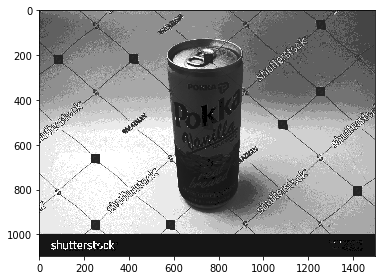

In [69]:
from skimage import exposure
from skimage import data, img_as_float
from skimage.io import imshow,imsave
img=cv2.imread('pics_highres/image data/validation/can/stock-photo-terengganu-malaysia-january-th-pokka-vanilla-milk-coffee-drink-with-real-brewed-coffee-358797734.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_eq=exposure.equalize_hist(gray)
imshow(img_eq)

In [58]:
img_eq

array([0.72079367, 0.495682  , 0.26116133, ..., 0.72079367, 0.495682  ,
       0.26116133])

In [40]:
cv2.imwrite('gray.jpg',dataset[1])

True

In [48]:
b=np.array([2,1,2,0,2,1,0,1])
to_categorical(b)

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


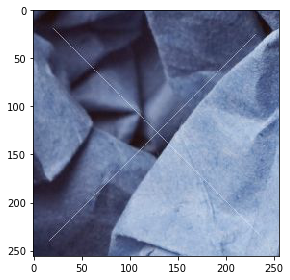

In [46]:
from skimage.io import imshow,imsave
img=cv2.imread('pics_whitebackground/paper/5523202-crumpled-paper-ball-isolated-on-a-white-background.jpg')
x,y=int(img.shape[1]/2),int(img.shape[0]/2)
crop1=img[x-128:x+128,y-128:y+128]
# img_eq=exposure.equalize_hist(dataset[2])
imshow(crop1)

In [54]:
from tensorflow import random_crop
from tensorflow import Session

/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


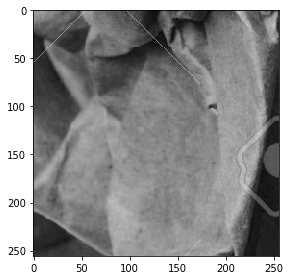

In [64]:
cropped=random_crop(img[:1000,:1000],[256,256,1])
imshow(Session().run(cropped).reshape(256,256))

In [67]:
cropped=random_crop(img[:1000,:1000],[256,256,1])
cv2.imwrite('abc.jpg',Session().run(cropped).reshape(256,256))

True

/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


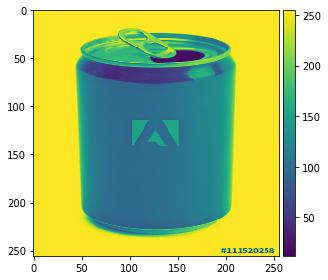

In [66]:
from skimage.io import imshow
imshow(dataset[102].reshape(256,256));

In [59]:
dataset.shape

(52, 256, 256)

In [45]:
dataset=dataset[:308]

In [6]:
model=Sequential()
model.add(Input(shape=(256,256,1)))

TypeError: The added layer must be an instance of class Layer. Found: Tensor("input_2:0", shape=(?, 256, 256, 1), dtype=float32)

In [2]:
model=Sequential()
model.add(Input(shape=(256,256,1)))
model.add(Conv2D(16,kernel_size=3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32,kernel_size=3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size=3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv2D(128,kernel_size=3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv2D(256,kernel_size=3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv2D(512,kernel_size=3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=8))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(3,activation='softmax',kernel_initializer='he_normal'))
model.compile(loss='categorical_crossentropy',optimizer=optmz,metrics=['accuracy'])
model.summary()

TypeError: The added layer must be an instance of class Layer. Found: Tensor("input_1:0", shape=(?, 256, 256, 1), dtype=float32)